#Projectile Motion of Canon Ball

> Computing and Visualizing Drag-Affected Projectile



This project simulates the trajectory of a projectile considering the effects of air resistance. Using numerical methods, the program computes the projectile motion and determines the optimal launch angle for maximum range. By solving differential equations governing the motion, it provides a more realistic model compared to idealized motion in a vacuum. The project visualizes the trajectory and analyzes how drag influences the path of projectile.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,quad
from scipy.integrate import solve_ivp

#Dimenstion of Canon ball and surrounding parameters

In [ ]:
g=9.81       # Acceleration due to gravity in m/s2
m=5          # Mass of canon ball in kg
V=100        # Initial velocity of canon ball in m/s
d=0.1143     # Diameter of canon ball in m
cd = 0.5     # Coefficient of drag of spherical bodies
rho = 1.2    # Density of air in kg/m3
A=(np.pi)*(d**2)/4
print('Area of canon ball in m2 is:',A)

Area of canon ball in m2 is: 0.010260826451724329


In [ ]:
P=-(rho*cd*A*V)/2*m     # Defining a variable for simplicity
ang = 60*np.pi/180      # Initial angle of projectile in radian

#Without drag

Text(0.5, 1.0, 'Projectile motion without drag')

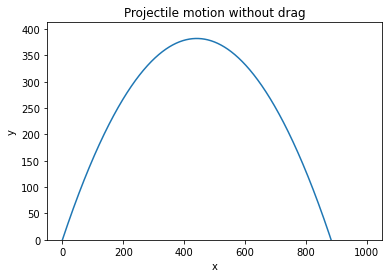

In [ ]:
def dSdt(t,S):          # Without drag
    x, u, y, v = S
    return [u,0,v,-g]

sol2 = solve_ivp(dSdt, [0, 20], y0=[0,V*np.cos(ang),0,V*np.sin(ang)], t_eval=np.linspace(0,20,1000))

plt.figure()
plt.plot(sol2.y[0],sol2.y[2])
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile motion without drag')

#With drag

Text(0.5, 1.0, 'Projectile motion with drag')

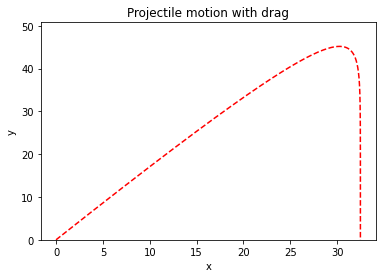

In [ ]:
def dsdt(t,S,P):         #With drag
    x, u, y, v = S
    return [u,P*u,v,-g+P*v]

sol1 = solve_ivp(dsdt, [0, 20], y0=[0,V*np.cos(ang),0,V*np.sin(ang)], t_eval=np.linspace(0,20,1000), args=(P,))

plt.figure()
plt.plot(sol1.y[0], sol1.y[2] ,'--r')
plt.ylim(bottom=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile motion with drag')

# Plot between Range and angles

In [ ]:
def range(ang, P):
    sol = solve_ivp(dsdt, [0, 20], y0=[0,V*np.cos(ang*np.pi/180),0,V*np.sin(ang*np.pi/180)], t_eval=np.linspace(0,20,1000), args=(P,))
    just_above_index = np.where(np.diff(np.sign(sol.y[2])) < 0)[0][0] #finding the postion of x where it crosses the origin i.e. y value becomes negative
    just_below_index = just_above_index + 1
    x_range = (sol.y[0][just_above_index] + sol.y[0][just_below_index])/2 #averaging the distance with positive y value location and neagtive y value location just nearby
    return x_range

Text(0.5, 1.0, 'Range vs Angles')

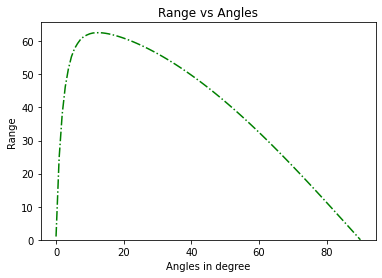

In [ ]:
ang = np.linspace(0, 90, 100)
x_range = np.vectorize(range)(ang,P)

plt.figure()
plt.plot(ang, x_range, '-.g')
plt.ylim(bottom=0)
plt.xlabel('Angles in degree')
plt.ylabel('Range')
plt.title('Range vs Angles')

# Finding angle corresponding to maximum distance (range)

In [ ]:
max_dist = max(x_range) #Maximum Range with drag
print('The maximum range for canon ball is', max_dist,'meters')

The maximum range for canon ball is 62.58869650267585 meters


In [ ]:
angle_range = np.column_stack((ang, x_range))
print(angle_range[angle_range[:,1] == max(angle_range[:,1])]) #angle corresponding to max range

[[12.72727273 62.5886965 ]]


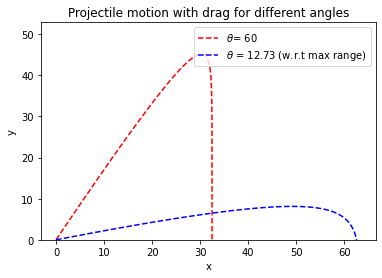

In [ ]:
#Plotting the trajectory with initial angle case

ang = 12.72727273
sol_extreme = solve_ivp(dsdt, [0, 20], y0=[0,V*np.cos(ang*np.pi/180),0,V*np.sin(ang*np.pi/180)], t_eval=np.linspace(0,20,1000), args=(P,))

plt.figure()
plt.plot(sol1.y[0], sol1.y[2] ,'--r')
plt.plot(sol_extreme.y[0], sol_extreme.y[2],'--b')
plt.ylim(0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile motion with drag for different angles')
plt.legend(['$\\theta$= 60', '$\\theta$ = 12.73 (w.r.t max range)']) #angles in degrees